In [5]:
# import lib
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

np.random.seed(6789)

(100, 2)


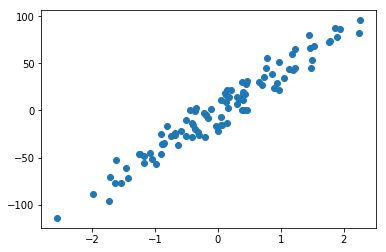

In [33]:
# create data
n_samples  = 100
n_outliers = 5
x, y      = datasets.make_regression(n_samples=n_samples, n_features=1,n_informative=1, noise=10, random_state=0)
X         = np.append(x,y[:,None],1)  

print(X.shape)
plt.scatter(X[:,0],X[:,1]); plt.show()

In [55]:
# simple objective
w = np.random.randn(2,1)
w = np.array([2,4])
print(w)

ww = w/np.sqrt((w**2).sum())
print(ww)
print((ww**2).sum())

[2 4]
[0.4472136  0.89442719]
0.9999999999999999


In [54]:
temp = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
print(np.sqrt(temp**2).sum())
print(
np.linalg.norm(temp)
)
print(
np.sqrt((temp**2).sum())
)
print(
temp@temp.T
)
print(
(temp**2).sum()
)

1.4142135623730951
1.0
1.0
1.0000000000000002
1.0000000000000002


# Reference 
1. Brownlee, J. (2018). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved 30 March 2019, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
2. notebook, S., & Davies, L. (2017). Shortcut key for changing code cell to markdown cell in jupyter notebook. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/47787721/shortcut-key-for-changing-code-cell-to-markdown-cell-in-jupyter-notebook
3. 
4.